In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2 
import random

In [34]:
df = pd.read_csv('fer2013.csv')
df.head(5)

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [35]:
df.groupby('Usage').count()

,emotion,pixels
Usage,,
PrivateTest,3589,3589
PublicTest,3589,3589
Training,28709,28709


In [36]:
df.groupby('emotion').count()

,pixels,Usage
emotion,,
0,4953,4953
1,547,547
2,5121,5121
3,8989,8989
4,6077,6077
5,4002,4002
6,6198,6198


In [37]:
print("Is any label null in data set:", df['emotion'].isnull().any())

Is any label null in data set: False


In [38]:
labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
df['label'] = df['emotion'].apply(lambda x: labels[int(x)])
print(df.shape)
df.head(5)

(35887, 4)


,emotion,pixels,Usage,label
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training,Angry
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training,Angry
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training,Fear
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training,Sad
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training,Neutral


Angry


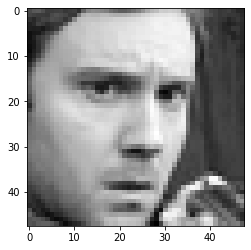

In [149]:
id = 0
image = np.reshape(np.array(df.pixels[id].split(' ')).astype(int),(48,48))
plt.imshow(image, cmap=plt.cm.gray)
print(df.label[id])

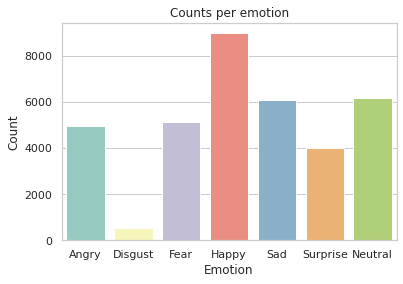

In [40]:
import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="label", data=df, order=labels, palette="Set3")
ax.set(ylabel="Count", xlabel="Emotion")
plt.title("Counts per emotion")
sns.reset_orig()

In [41]:
train = df[df.Usage == 'Training']
val = df[df.Usage == 'PublicTest']
test = df[df.Usage == 'PrivateTest']

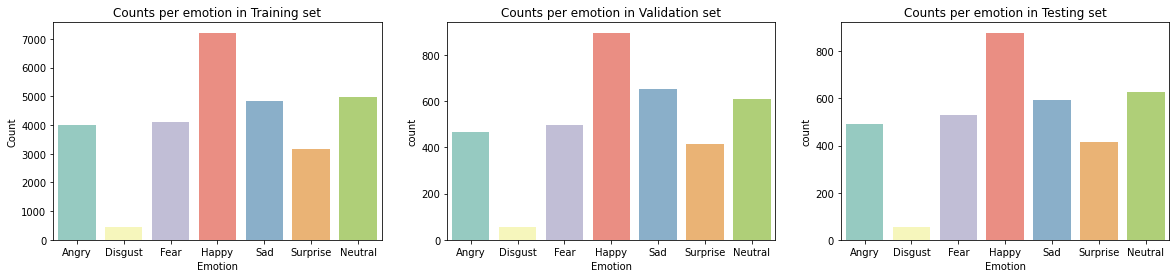

In [42]:
plt.figure(figsize=(20, 4))

plt.subplot(1,3,1)
ax = sns.countplot(x="label", data=train, order=labels, palette="Set3")
ax.set(ylabel="Count", xlabel="Emotion")
plt.title("Counts per emotion in Training set")

plt.subplot(1,3,2)
ax = sns.countplot(x="label", data=val, order=labels, palette="Set3")
ax.set(ylabel="count", xlabel="Emotion")
plt.title("Counts per emotion in Validation set")

plt.subplot(1,3,3)
ax = sns.countplot(x="label", data=test, order=labels, palette="Set3")
ax.set(ylabel="count", xlabel="Emotion")
plt.title("Counts per emotion in Testing set")
sns.reset_orig()

In [199]:
print('Train len:',  len(train))
train[['label','pixels']].groupby('label').count()

Train len: 28709


,pixels
label,
Angry,3995
Disgust,436
Fear,4097
Happy,7215
Neutral,4965
Sad,4830
Surprise,3171


In [44]:
print('Validation len:',  len(val))
val[['label','pixels']].groupby('label').count()

Validation len: 3589


,pixels
label,
Angry,467
Disgust,56
Fear,496
Happy,895
Neutral,607
Sad,653
Surprise,415


In [46]:
print('Test len:',  len(val))
test[['label','pixels']].groupby('label').count()

Test len: 3589


,pixels
label,
Angry,491
Disgust,55
Fear,528
Happy,879
Neutral,626
Sad,594
Surprise,416


### Get each sample from each motion from test dataset and plot them

In [190]:
from keras.utils.np_utils import to_categorical
X_test =  np.load("data/test_pixels.npy")
y_test =  np.load("data/test_labels.npy")

X_test = np.expand_dims(X_test, -1).astype("float32") / 255
y_test = to_categorical(y_test, num_classes=7)

In [195]:
np.random.seed(32) #30
y_true = np.argmax(y_test,axis = 1) 
angry = np.where(y_true == 0)[0]
disgust = np.where(y_true == 1)[0]
fear = np.where(y_true == 2)[0]
happy = np.where(y_true == 3)[0]
sad = np.where(y_true == 4)[0]
suprise = np.where(y_true == 5)[0]
neutral = np.where(y_true == 6)[0]

rands = []
rands.append(np.random.choice(angry, 1)[0])
rands.append(np.random.choice(disgust, 1)[0])
rands.append(np.random.choice(fear, 1)[0])
rands.append(np.random.choice(happy, 1)[0])
rands.append(np.random.choice(sad, 1)[0])
rands.append(np.random.choice(suprise, 1)[0])
rands.append(np.random.choice(neutral, 1)[0])
rands

[2082, 496, 1621, 3404, 3273, 687, 751]

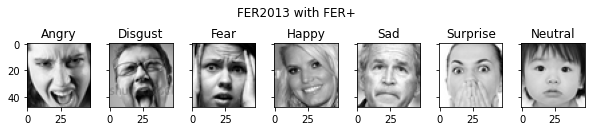

In [198]:
labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(1, 7, sharex=True,sharey=True,figsize=(10, 2))
axs=(ax1, ax2, ax3, ax4, ax5, ax6, ax7)
plt.subplots_adjust(wspace=0.3)
fig.suptitle('FER2013 with FER+')

for i, index in enumerate(rands):
  x = np.array([X_test[index]])
  axs[i].imshow(X_test[index][:,:,0], cmap=plt.cm.gray)
  e_id= np.argmax(y_test[index])              
  axs[i].set_title(labels[e_id] )

plt.show()